## 20201129 PMI vars all reps combined

Overview:
- these are the 3 replicates combined:
    - 20201113, 20201125, 20201126
    - only taking 0 and 1uM AHL values from 20201113 

Conditions:
- 30C, LB media, deepwell plates
- 1:100 Dilution of saturated overnight culture into inducing conditions before overnight growth again
- assessed saturated culture the next day
- OC6AHL: 0-1uM (induces RiPP half of intein)

Notes:
- 

Strains:

|Strain name| Description|
|---|---|
sDAA915|PMI + mdm2 intein
sDAA916|PMI 1A  + mdm2 intein
sDAA917|PMI 2A + mdm2 intein
sDAA918|PMI 3A + mdm2 intein
sDAA919|PMI 5A + mdm2 intein
sDAA920|PMI 6A + mdm2 intein
sDAA921|PMI 7A + mdm2 intein
sDAA922|PMI 8A + mdm2 intein
sDAA923|PMI 9A + mdm2 intein
sDAA924|PMI 10A + mdm2 intein
sDAA925|PMI 11A + mdm2 intein
sDAA926|PMI 12A + mdm2 intein
sDAA927|PMI + RBD intein
sDAA928|PMI 1A + RBD intein
sDAA929|PMI 2A+ RBD intein
sDAA930|PMI 3A+ RBD intein
sDAA931|PMI 5A+ RBD intein
sDAA932|PMI 6A+ RBD intein
sDAA933|PMI 7A+ RBD intein
sDAA934|PMI 8A+ RBD intein
sDAA935|PMI 9A+ RBD intein
sDAA936|PMI 10A+ RBD intein
sDAA937|PMI 11A+ RBD intein
sDAA938|PMI 12A+ RBD intein

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import sys
import cytoflow as flow
import string
import pandas as pd
import seaborn as sns
from scipy import stats
import re
import matplotlib.colors as colors

sys.path.append('../modules')
import cf_imports
import cf_helpers

In [2]:
import matplotlib
%matplotlib inline

In [3]:
matplotlib.rc('figure', dpi = 150)
sns.set_style('ticks')

In [4]:
# Import reloads for when modules are being changed
import importlib
importlib.reload(cf_imports)
importlib.reload(cf_helpers)

<module 'cf_helpers' from '../modules\\cf_helpers.py'>

## Data Import

In [5]:
# Import replicate 1 and remove unnecessary AHLs
#exp_df = pd.read_pickle('20201113_pmi_var_exp_df.pkl')
#exp_df = exp_df[exp_df['AHL'].isin([0,1])]
#exp_df['repl'] = 1

#exp_df.to_pickle('20201113_trimmed.pkl')

In [6]:
# Import replicate 1
#exp_df= pd.read_pickle('20201113_trimmed.pkl')

In [7]:
# Provide full path to flow cytometry .fcs file directory and pass to fixer
exp_dirs = [
    r'C:\Users\Dan\Dropbox (MIT)\Flow Data\20201125_pmi_var_amk1057_vars_rep2\20201125_pmi_var_amk1057_vars_plate3_pmi_vars',
    r'C:\Users\Dan\Dropbox (MIT)\Flow Data\20201126_pmi_var_amk1057_vars_rep3\20201126_pmi_var_amk1057_vars_rep3_plate3',
]
conds_dir = None

# Loop through all and add to one dataframe
for exp_dir in exp_dirs:
    fcs_dir = cf_imports.dir_fix(exp_dir)
    exp = cf_imports.exp_from_dirs(fcs_dir, conds_dir, event_num = 20000) #subset 5000 events
    
    exp_df = exp_df.append(exp.data)

# Also append previously extracted data 


C:\Users\Dan\Anaconda3\envs\cf_upd_seaborn\lib\site-packages\cytoflow\operations\import_op.py:381: CytoflowWarning: Only 17816 events in tube C:/Users/Dan/Dropbox (MIT)/Flow Data/20201125_pmi_var_amk1057_vars_rep2/20201125_pmi_var_amk1057_vars_plate3_pmi_vars\Specimen_001_A12_A12.fcs


KeyboardInterrupt: 

### Generate strain / name mapping

## Load pickle

In [7]:
#exp_df.to_pickle('all_PMI_reps_combined.pkl')
exp_df = pd.read_pickle('all_PMI_reps_combined.pkl')

### Generate strain / name mapping

In [8]:
all_strains = list(exp_df['strain'].unique())

names = []
for strain in all_strains:
    str_df = exp_df[exp_df['strain'] == strain]
    name = str_df['name'].values[0] + ' | ' + str_df['bait'].values[0]
    names.append(name)
    
name_dict = dict(zip(all_strains, names))

## Extract median values

In [9]:
"""
## Rename strains to include mutation
renamed = {
    'PMI': 'PMI',
    'PMI 1A': 'PMI T1A',
    'PMI 2A': 'PMI S2A',
    'PMI 3A': 'PMI F3A',
    'PMI 5A': 'PMI E5A',
    'PMI 6A': 'PMI Y6A',
    'PMI 7A': 'PMI W7A',
    'PMI 8A': 'PMI N8A',
    'PMI 9A': 'PMI L9A',
    'PMI 10A': 'PMI L10A',
    'PMI 11A': 'PMI S11A',
    'PMI 12A': 'PMI P12A',
}

exp_df_median = exp_df_median.replace(renamed)
"""

"\n## Rename strains to include mutation\nrenamed = {\n    'PMI': 'PMI',\n    'PMI 1A': 'PMI T1A',\n    'PMI 2A': 'PMI S2A',\n    'PMI 3A': 'PMI F3A',\n    'PMI 5A': 'PMI E5A',\n    'PMI 6A': 'PMI Y6A',\n    'PMI 7A': 'PMI W7A',\n    'PMI 8A': 'PMI N8A',\n    'PMI 9A': 'PMI L9A',\n    'PMI 10A': 'PMI L10A',\n    'PMI 11A': 'PMI S11A',\n    'PMI 12A': 'PMI P12A',\n}\n\nexp_df_median = exp_df_median.replace(renamed)\n"

In [10]:
exp_df_median = exp_df.groupby(['name', 'AHL', 'bait', 'repl']).agg('median')['FITC-A'].reset_index()
exp_df_median.head()



,name,AHL,bait,repl,FITC-A
0,PMI,0.0,mdm2,1,2273.850098
1,PMI,0.0,mdm2,2,2803.020020
2,PMI,0.0,mdm2,3,2970.419922
3,PMI,0.0,rbd,1,17.670000
4,PMI,0.0,rbd,2,21.389999


In [11]:
# exp_df_median.to_pickle('pmi_all_reps_median_df.pkl')
exp_df_median = pd.read_pickle('pmi_all_reps_median_df.pkl')

In [12]:
names_order = ['PMI', 'PMI T1A', 'PMI S2A', 'PMI F3A', 'PMI E5A', 'PMI Y6A', 'PMI W7A', 'PMI N8A', 'PMI L9A', 'PMI L10A', 'PMI S11A', 'PMI P12A']

### Plot inductions

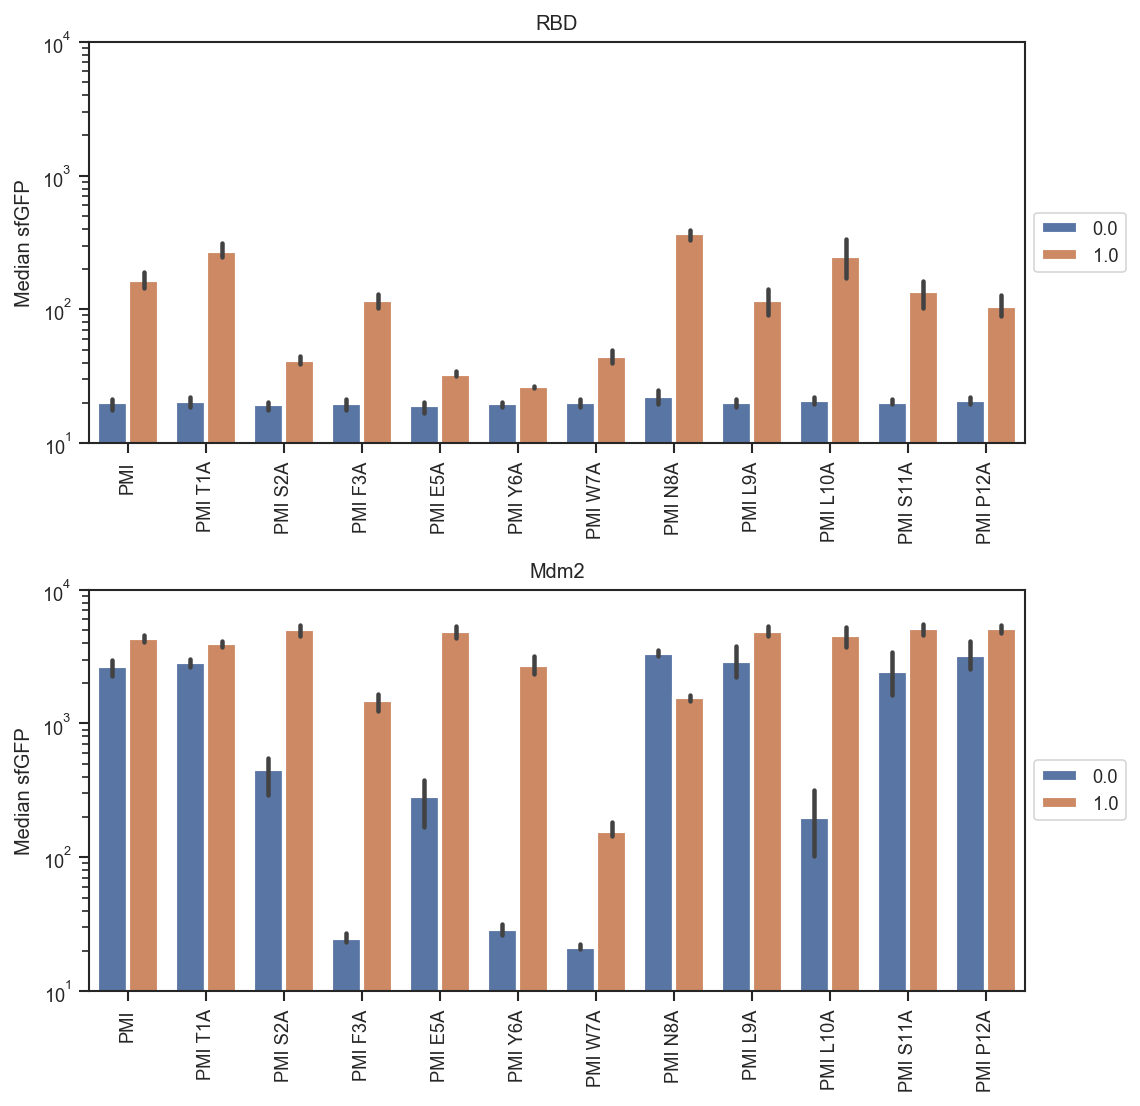

In [13]:
fig, axs = plt.subplots(figsize = (8,8),nrows = 2)
plt.tight_layout(pad = 5)

rbd_df = exp_df_median[exp_df_median['bait'] == 'rbd']
g1 = sns.barplot(x = 'name', y = 'FITC-A', hue = 'AHL', data = rbd_df, order = names_order, ax = axs[0], linewidth = 2)
g1.set_title('RBD')

mdm2_df = exp_df_median[exp_df_median['bait'] == 'mdm2']
g2 = sns.barplot(x = 'name', y = 'FITC-A', hue = 'AHL', data = mdm2_df, order = names_order, ax = axs[1], linewidth = 2)
g2.set_title('Mdm2')

for ax in axs:
    ax.set_ylabel('Median sfGFP')
    ax.set_xlabel('')
    ax.set_ylim(1e1,1e4)
    #ax.set_xscale('symlog', linthreshx = 0.00001)
    ax.set_yscale('log')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

g1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
g2.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.show()

PMI 8A shows weird non-monotonic response at higher AHL concentrations in the Mdm2 system

## Specificity calculations

Divide values in RBD system by values in Mdm2 system

In [14]:
grouped_df = exp_df_median.groupby(['name', 'AHL', 'repl'])

In [15]:
def specificity(x):
    spec = x[x['bait'] == 'mdm2']['FITC-A'].values[0] / x[x['bait'] == 'rbd']['FITC-A'].values[0]
    #print(x)
    return pd.Series({'specificity':spec})

In [16]:
spec_df = grouped_df.apply(specificity).reset_index()
spec_df.head()

,name,AHL,repl,specificity
0,PMI,0.0,1,128.684215
1,PMI,0.0,2,131.043483
2,PMI,0.0,3,138.869566
3,PMI,1.0,1,32.019481
4,PMI,1.0,2,24.760000


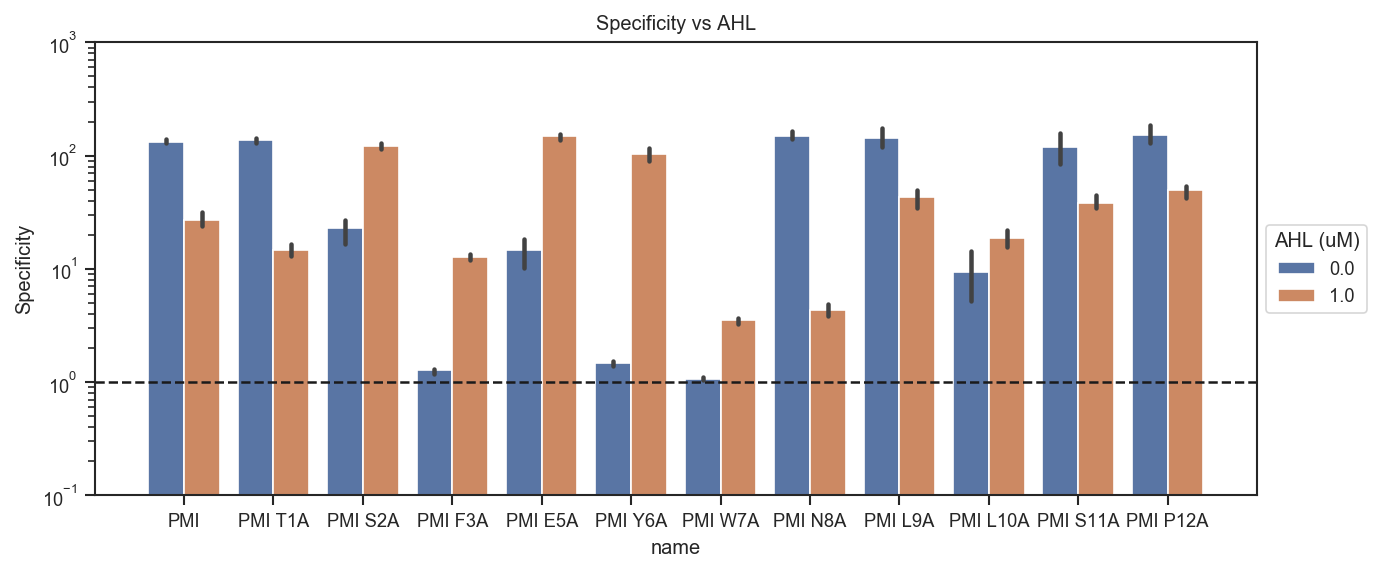

In [17]:
fig, ax = plt.subplots(figsize = (10,4))

g = sns.barplot(x = 'name', y = 'specificity', hue = 'AHL', data = spec_df, order = names_order, ax = ax)
ax.hlines(y = 1, xmin =-1, xmax = 12, linestyles = 'dashed')

ax.set_ylabel('Specificity')
ax.set_ylim(1e-1,1e3)
ax.set_xlim(-1,12)
ax.set_yscale('log')

g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, title = 'AHL (uM)')
g.set_title('Specificity vs AHL')
#g.set_xticks(range(len(strain_list))) # <--- set the ticks first
#g.set_xticklabels(name_list, rotation = 90)

plt.show()

## Find a metric for comparing Kds to intein system values

Approach:
- Rank-order comparison at first
- possible things to look at :
    - expression at minimum AHL in Mdm2 system,
    - expression at maximum AHL in Mdm2 system
    - 'IC50' of AHL? (would have to fit curves)
    - specificity at maximum
    - specificity at minimum
    - specificity at 'IC50'

In [18]:
### Modify df to combine RBD and MDM2 observations into a single row

pivoted_df = pd.pivot_table(data = exp_df_median, index = ['name', 'repl', 'AHL'], columns = 'bait', values = 'FITC-A').reset_index()
pivoted_df['specif'] = pivoted_df['mdm2'] / pivoted_df['rbd']
pivoted_df.head()

bait,name,repl,AHL,mdm2,rbd,specif
0,PMI,1,0.0,2273.850098,17.670000,128.684215
1,PMI,1,1.0,4585.830078,143.220001,32.019481
2,PMI,2,0.0,2803.020020,21.389999,131.043483
3,PMI,2,1.0,4029.689941,162.750000,24.760000
4,PMI,3,0.0,2970.419922,21.389999,138.869566


In [19]:
# Make a table with real-world KD values
var_name = ['PMI', 'PMI T1A', 'PMI S2A', 'PMI F3A', 'PMI E5A', 'PMI Y6A', 'PMI W7A', 'PMI N8A', 'PMI L9A', 'PMI L10A', 'PMI S11A', 'PMI P12A']
kds = [3.2e-9, 6.2e-9, 2.7e-8, 3.8e-5, 2.1e-8, 6.1e-7, 1.6e-4, 4.9e-10, 2.4e-9, 8.9e-7, 3.9e-9, 2.1e-9]

kds_df = pd.DataFrame({'name': var_name, 'kd': kds}).set_index('name')
kds_df

,kd
name,
PMI,3.200000e-09
PMI T1A,6.200000e-09
PMI S2A,2.700000e-08
PMI F3A,3.800000e-05
PMI E5A,2.100000e-08
PMI Y6A,6.100000e-07
PMI W7A,1.600000e-04
PMI N8A,4.900000e-10
PMI L9A,2.400000e-09


### Put all possible metrics into Kds df by deriving them from the pivoted df

In [20]:
pivoted_df.head()

bait,name,repl,AHL,mdm2,rbd,specif
0,PMI,1,0.0,2273.850098,17.670000,128.684215
1,PMI,1,1.0,4585.830078,143.220001,32.019481
2,PMI,2,0.0,2803.020020,21.389999,131.043483
3,PMI,2,1.0,4029.689941,162.750000,24.760000
4,PMI,3,0.0,2970.419922,21.389999,138.869566


### Metrics

In [21]:
# expression at min AHL for mdm2
def mdm2_min_ahl(df):
    new_col = pd.Series({'Min AHL, Mdm2 expr': df[df['AHL'] == 0]['mdm2'].values[0]})
    return(new_col)

# expression at max AHL for mdm2
def mdm2_max_ahl(df):
    new_col = pd.Series({'Max AHL, Mdm2 expr': df[df['AHL'] == 1]['mdm2'].values[0]})
    return(new_col)

# specificity at min AHL
def spec_min_ahl(df):
    new_col = pd.Series({'Min AHL, Specificity': df[df['AHL'] == 0]['specif'].values[0]})
    return(new_col)

# specificity at max AHL
def spec_max_ahl(df):
    new_col = pd.Series({'Max AHL, Specificity': df[df['AHL'] == 1]['specif'].values[0]})
    return(new_col)

# max specificity
def spec_max(df):
    new_col = pd.Series({'Max specificity': df['specif'].max()})
    return(new_col)

# Expression at max AHL for RBD (off target)
def rbd_max_ahl(df):
    new_col = pd.Series({'Max AHL, RBD expr': df[df['AHL'] == 1]['rbd'].values[0]})
    return(new_col)

# Expression at min AHL for RBD (off target)
def rbd_min_ahl(df):
    new_col = pd.Series({'Min AHL, RBD expr': df[df['AHL'] == 0]['rbd'].values[0]})
    return(new_col)

# Specificity derived from min AHL Mdm2 and max AHL RBD
def min_max_spec(df):
    min_ahl_mdm2 = df[df['AHL'] == 0]['mdm2'].values[0]
    max_ahl_rbd = df[df['AHL'] == 1]['rbd'].values[0]
    new_col = pd.Series({'min_max_spec': min_ahl_mdm2 / max_ahl_rbd})
    return(new_col)

fx_list = [mdm2_min_ahl, mdm2_max_ahl, spec_min_ahl, spec_max_ahl,spec_max,rbd_max_ahl, rbd_min_ahl, min_max_spec]

In [22]:
## Apply all functions and merge onto the kds df
for i,fxn in enumerate(fx_list):
    new_col = pivoted_df.groupby(['name', 'repl']).apply(fxn).reset_index()
    if i == 0:
        metrics_df = new_col
    else:
        metrics_df = metrics_df.merge(new_col, on = ['name', 'repl'])
        
metrics_df['kd'] = kds_df.loc[metrics_df['name']].values
metrics_df.head()

,name,repl,"Min AHL, Mdm2 expr","Max AHL, Mdm2 expr","Min AHL, Specificity","Max AHL, Specificity",Max specificity,"Max AHL, RBD expr","Min AHL, RBD expr",min_max_spec,kd
0,PMI,1,2273.850098,4585.830078,128.684215,32.019481,128.684215,143.220001,17.670000,15.876624,3.200000e-09
1,PMI,2,2803.020020,4029.689941,131.043483,24.760000,131.043483,162.750000,21.389999,17.222857,3.200000e-09
2,PMI,3,2970.419922,4524.450195,138.869566,23.731709,138.869566,190.649994,21.389999,15.580488,3.200000e-09
3,PMI E5A,1,169.259995,5364.240234,10.111111,155.891899,155.891899,34.410000,16.740000,4.918919,2.100000e-08
4,PMI E5A,2,318.989990,4343.565186,15.590908,137.367649,137.367649,31.620001,20.460001,10.088235,2.100000e-08


### Plot all metrics

In [23]:
## Plot all the metrics against eachother
metrics = list(metrics_df.columns.values)
metrics.remove('kd')
metrics.remove('name')
metrics.remove('repl')
metrics

['Min AHL, Mdm2 expr',
 'Max AHL, Mdm2 expr',
 'Min AHL, Specificity',
 'Max AHL, Specificity',
 'Max specificity',
 'Max AHL, RBD expr',
 'Min AHL, RBD expr',
 'min_max_spec']

In [24]:
def plt_metric(df,metric,ax):
    sns.scatterplot(x = 'kd', y = metric, data =df, ax = ax)
    
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim(1e-10,1e-3)
    
    ax.set_xlabel('In vitro $K_D$')
    ax.set_title(metric)

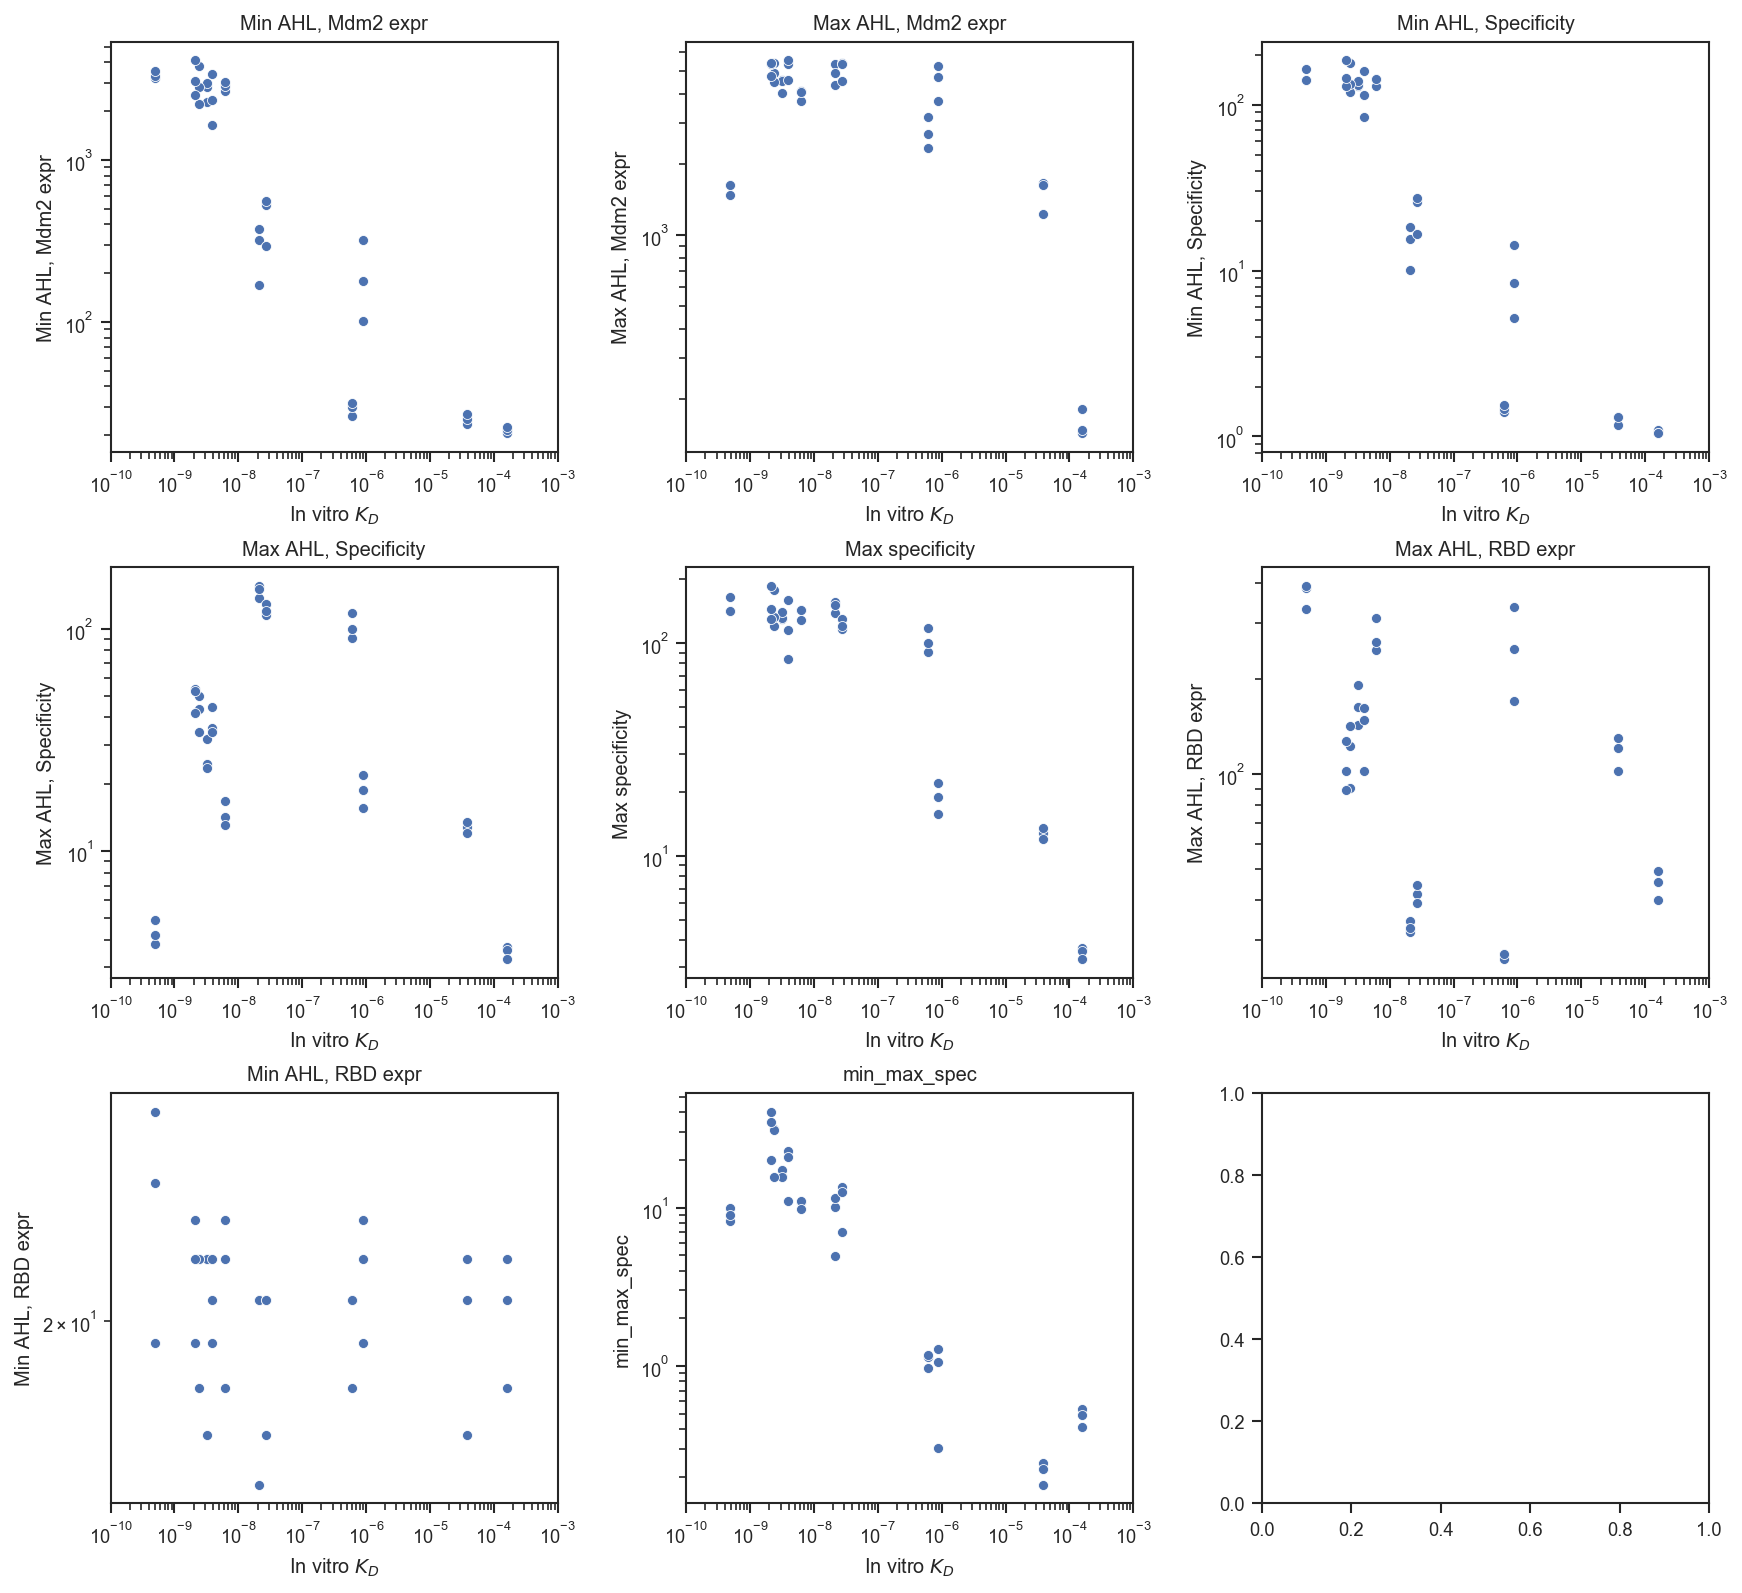

In [25]:
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (12,11))
plt.tight_layout(pad = 3.5)

for metric, ax in zip(metrics,axs.flatten()):
    plt_metric(metrics_df,metric,ax)

### Calculate Spearman correlation coefficients

In [26]:
from scipy import stats

def calc_sp(df,metric_name):
    kds = df['kd'].values # Extract kd values
    metric_vals = df[metric_name].values # Extract values for the metric 
    
    return(stats.spearmanr(kds,metric_vals))
    

In [27]:
for metric in metrics:
    rho, p = calc_sp(metrics_df, metric)
    print('{}: correlation = {:.3}, p-val = {:.3}'.format(metric,rho, p))

Min AHL, Mdm2 expr: correlation = -0.907, p-val = 2.65e-14
Max AHL, Mdm2 expr: correlation = -0.371, p-val = 0.0259
Min AHL, Specificity: correlation = -0.901, p-val = 7.15e-14
Max AHL, Specificity: correlation = -0.15, p-val = 0.382
Max specificity: correlation = -0.787, p-val = 1.26e-08
Max AHL, RBD expr: correlation = -0.405, p-val = 0.0142
Min AHL, RBD expr: correlation = -0.255, p-val = 0.134
min_max_spec: correlation = -0.782, p-val = 1.84e-08


In [28]:
metrics_df

,name,repl,"Min AHL, Mdm2 expr","Max AHL, Mdm2 expr","Min AHL, Specificity","Max AHL, Specificity",Max specificity,"Max AHL, RBD expr","Min AHL, RBD expr",min_max_spec,kd
0,PMI,1,2273.850098,4585.830078,128.684215,32.019481,128.684215,143.220001,17.670000,15.876624,3.200000e-09
1,PMI,2,2803.020020,4029.689941,131.043483,24.760000,131.043483,162.750000,21.389999,17.222857,3.200000e-09
2,PMI,3,2970.419922,4524.450195,138.869566,23.731709,138.869566,190.649994,21.389999,15.580488,3.200000e-09
3,PMI E5A,1,169.259995,5364.240234,10.111111,155.891899,155.891899,34.410000,16.740000,4.918919,2.100000e-08
4,PMI E5A,2,318.989990,4343.565186,15.590908,137.367649,137.367649,31.620001,20.460001,10.088235,2.100000e-08
5,PMI E5A,3,374.790009,4899.240234,18.318181,150.514296,150.514296,32.549999,20.460001,11.514286,2.100000e-08
6,PMI F3A,1,23.250000,1668.420044,1.315789,12.814286,12.814286,130.199997,17.670000,0.178571,3.800000e-05
7,PMI F3A,2,25.110001,1229.459961,1.173913,12.018181,12.018181,102.300003,21.389999,0.245455,3.800000e-05
8,PMI F3A,3,26.969999,1631.219971,1.318182,13.492307,13.492307,120.900002,20.460001,0.223077,3.800000e-05
9,PMI L10A,1,101.370003,5256.359863,5.190476,15.656509,15.656509,335.730011,19.530001,0.301939,8.900000e-07


Text(0.5, 1.0, 'Min AHL, Mdm2 expr')

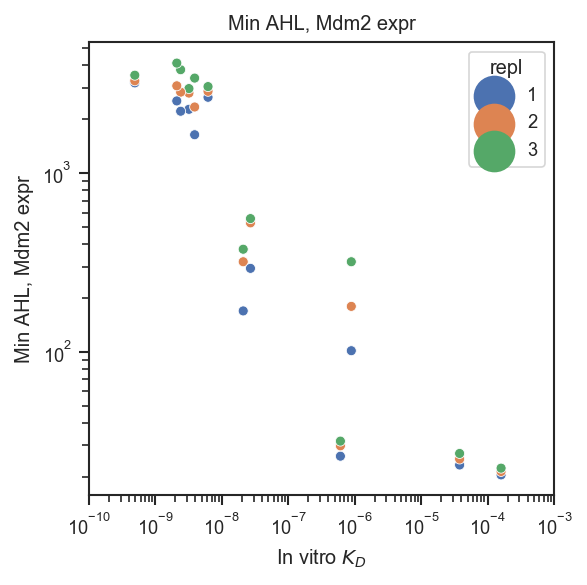

In [29]:
metric = 'Min AHL, Mdm2 expr'

fig, ax = plt.subplots(figsize = (4,4))

sns.scatterplot(x = 'kd', y = metric, data =metrics_df, hue = 'repl', ax = ax)
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1e-10,1e-3)

ax.set_xlabel('In vitro $K_D$')
ax.set_title(metric)


Text(0.5, 1.0, 'Max AHL, Mdm2 expr')

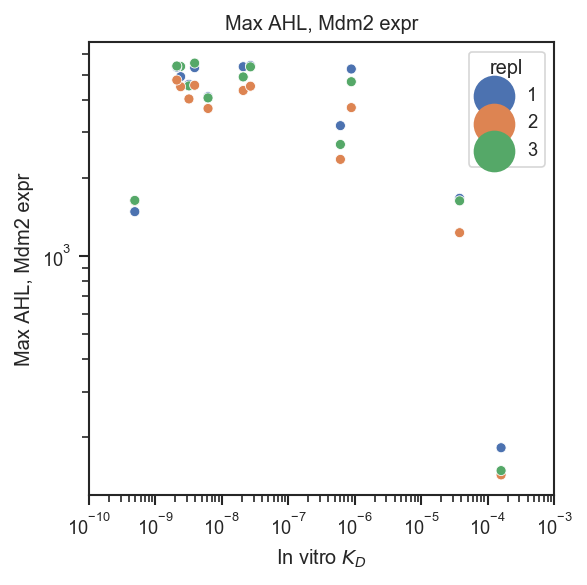

In [30]:
metric = 'Max AHL, Mdm2 expr'

fig, ax = plt.subplots(figsize = (4,4))

sns.scatterplot(x = 'kd', y = metric, data =metrics_df, hue = 'repl', ax = ax)
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1e-10,1e-3)

ax.set_xlabel('In vitro $K_D$')
ax.set_title(metric)


### Pretty plots for PD
* In vitro $K_D$ vs expression (at minimum AHL) for on-target and off-target

In [31]:
metrics_df.head()

,name,repl,"Min AHL, Mdm2 expr","Max AHL, Mdm2 expr","Min AHL, Specificity","Max AHL, Specificity",Max specificity,"Max AHL, RBD expr","Min AHL, RBD expr",min_max_spec,kd
0,PMI,1,2273.850098,4585.830078,128.684215,32.019481,128.684215,143.220001,17.670000,15.876624,3.200000e-09
1,PMI,2,2803.020020,4029.689941,131.043483,24.760000,131.043483,162.750000,21.389999,17.222857,3.200000e-09
2,PMI,3,2970.419922,4524.450195,138.869566,23.731709,138.869566,190.649994,21.389999,15.580488,3.200000e-09
3,PMI E5A,1,169.259995,5364.240234,10.111111,155.891899,155.891899,34.410000,16.740000,4.918919,2.100000e-08
4,PMI E5A,2,318.989990,4343.565186,15.590908,137.367649,137.367649,31.620001,20.460001,10.088235,2.100000e-08


#### On-target

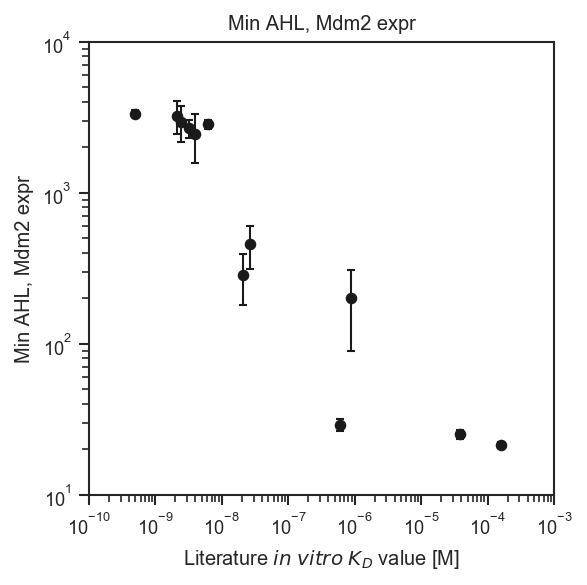

In [32]:
metric = 'Min AHL, Mdm2 expr'

fig, ax = plt.subplots(figsize = (4,4))

sns.lineplot(x = 'kd', y = metric, data =metrics_df, ax = ax, markers = 'o', 
             color = 'k',
             err_style = 'bars', ci = 'sd', err_kws = {'elinewidth': 1, 'capsize': 2})

ax.lines[0].set_linestyle('') # Remove lines
ax.lines[0].set_marker('o')
ax.lines[0].set_markeredgecolor('k')
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1e-10,1e-3)
ax.set_ylim(1e1,1e4)

ax.set_xlabel('Literature $in$ $vitro$ $K_D$ value [M]')
ax.set_title(metric)

plt.show()


#### Off-target

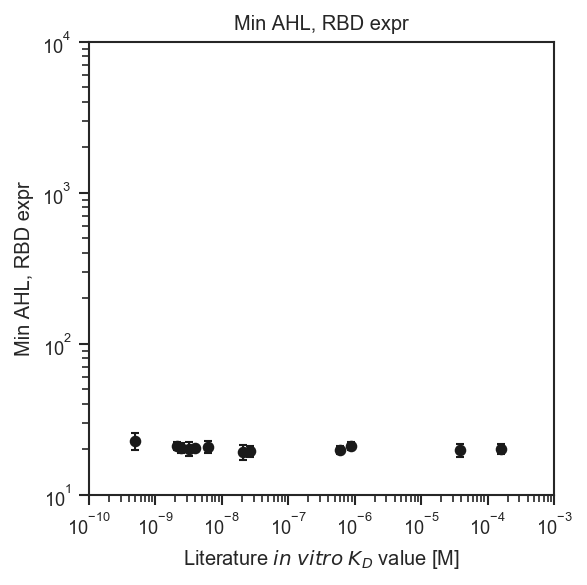

In [33]:
metric = 'Min AHL, RBD expr'

fig, ax = plt.subplots(figsize = (4,4))

sns.lineplot(x = 'kd', y = metric, data =metrics_df, ax = ax, markers = 'o', 
             color = 'k',
             err_style = 'bars', ci = 'sd', err_kws = {'elinewidth': 1, 'capsize': 2})

ax.lines[0].set_linestyle('') # Remove lines
ax.lines[0].set_marker('o')
ax.lines[0].set_markeredgecolor('k')
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1e-10,1e-3)
ax.set_ylim(1e1,1e4)

ax.set_xlabel('Literature $in$ $vitro$ $K_D$ value [M]')
ax.set_title(metric)

plt.show()


#### Together

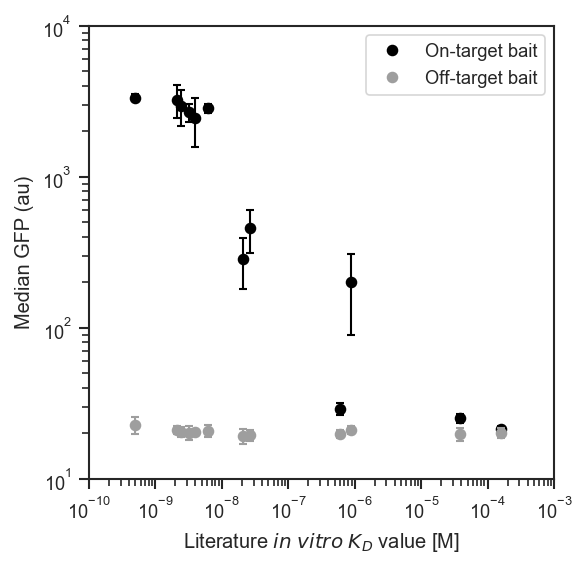

In [34]:
fig, ax = plt.subplots(figsize = (4,4))
colors = ['black', '#9e9e9e']

for i, metric in enumerate(['Min AHL, Mdm2 expr', 'Min AHL, RBD expr']):
    
    mult_i = i*4 # Some hacky shit to get the ax.lines to line up with the iterator
    
    # Plot the metric
    sns.lineplot(x = 'kd', y = metric, data =metrics_df, ax = ax, markers = 'o', 
                 color = colors[i],
                 err_style = 'bars', ci = 'sd', err_kws = {'elinewidth': 1, 'capsize': 2})

    ax.lines[mult_i].set_linestyle('') # Remove lines
    ax.lines[mult_i].set_marker('o')
    ax.lines[mult_i].set_markeredgecolor(colors[i])
    
    
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1e-10,1e-3)
ax.set_ylim(1e1,1e4)

ax.set_xlabel('Literature $in$ $vitro$ $K_D$ value [M]')
ax.set_ylabel('Median GFP (au)')

ax.legend(['On-target bait', 'Off-target bait'], markerscale = 1)

# Plot a fake fit line w/ power law
#xs = np.logspace(-10,-3,50)
#ys = [0.75*x**(-0.4) for x in xs]
#ax.plot(xs, ys)

plt.show()


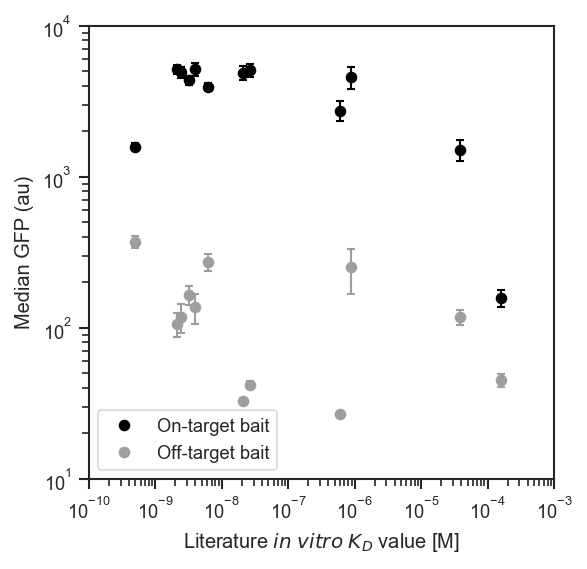

In [35]:
fig, ax = plt.subplots(figsize = (4,4))
colors = ['black', '#9e9e9e']

for i, metric in enumerate(['Max AHL, Mdm2 expr', 'Max AHL, RBD expr']):
    
    mult_i = i*4 # Some hacky shit to get the ax.lines to line up with the iterator
    
    # Plot the metric
    sns.lineplot(x = 'kd', y = metric, data =metrics_df, ax = ax, markers = 'o', 
                 color = colors[i],
                 err_style = 'bars', ci = 'sd', err_kws = {'elinewidth': 1, 'capsize': 2})

    ax.lines[mult_i].set_linestyle('') # Remove lines
    ax.lines[mult_i].set_marker('o')
    ax.lines[mult_i].set_markeredgecolor(colors[i])
    
    
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1e-10,1e-3)
ax.set_ylim(1e1,1e4)

ax.set_xlabel('Literature $in$ $vitro$ $K_D$ value [M]')
ax.set_ylabel('Median GFP (au)')

ax.legend(['On-target bait', 'Off-target bait'], markerscale = 1)

# Plot a fake fit line w/ power law
#xs = np.logspace(-10,-3,50)
#ys = [0.75*x**(-0.4) for x in xs]
#ax.plot(xs, ys)

plt.show()


## Plots for the paper

Set global parameters to use for plotting

In [36]:
import matplotlib as mpl

## Set global Parameters
save_dir = r"C:\Users\Dan\Dropbox (MIT)\COVID manuscript\figures\python_figures"+ '\\'
# Plot parameters
font_sz = 6
line_width = 0.6

def set_plt_defaults():
    plt.rcParams.update(plt.rcParamsDefault)

    # Figure-level
    mpl.rcParams['figure.dpi'] = 300

    # Colors
    mpl.rcParams['text.color'] = '#000000'
    mpl.rcParams['axes.edgecolor'] = '#000000'
    mpl.rcParams['axes.labelcolor'] = '#000000'
    mpl.rcParams['axes.facecolor'] = '#FFFFFF'

    # Fonts
    mpl.rcParams['font.sans-serif'] = 'Arial'
    mpl.rcParams['legend.fontsize'] = font_sz
    mpl.rcParams['axes.labelsize'] = font_sz
    mpl.rcParams['axes.titlesize'] = font_sz
    mpl.rcParams['legend.title_fontsize'] = font_sz
    mpl.rcParams['xtick.labelsize'] = font_sz
    mpl.rcParams['ytick.labelsize'] = font_sz

    # Axes
    mpl.rcParams['xtick.direction'] = 'in'
    mpl.rcParams['ytick.direction'] = 'in'
    mpl.rcParams['axes.linewidth'] = line_width

    # Markers / lines
    mpl.rcParams['lines.markersize'] = 3*line_width
    mpl.rcParams['lines.linewidth'] = 1.5*line_width
    mpl.rcParams['lines.color'] = '#000000'

    # Export
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['savefig.bbox'] = 'tight'
    mpl.rcParams['savefig.transparent'] = True

In [37]:
def plot_by_kd(metrics_df, metrics):
    set_plt_defaults()
    fig, ax = plt.subplots(figsize = (1.75,1.75))


    colors = ['black', '#9e9e9e']

    for i, metric in enumerate(metrics):

        mult_i = i*4 # Some hacky shit to get the ax.lines to line up with the iterator

        # Plot the metric
        sns.lineplot(x = 'kd', y = metric, data =metrics_df, ax = ax, markers = 'o', 
                     color = colors[i], ms = 4*line_width,
                     err_style = 'bars', ci = 'sd', 
                     err_kws = {
                         'elinewidth': line_width, 'capsize': line_width*2, 'capthick': line_width
                     })

        ax.lines[mult_i].set_linestyle('') # Remove lines
        ax.lines[mult_i].set_marker('o')
        ax.lines[mult_i].set_markeredgecolor(colors[i])

    ax.set_yscale('log')
    ax.set_xscale('log', subsx = [2, 3, 4, 5, 6, 7, 8, 9])
    ax.set_xlim(1e-10,1e-3)
    ax.set_ylim(1e1,1e4)

    ax.set_xlabel('Literature $in$ $vitro$ $K_D$ value [M]')
    ax.set_ylabel('Fluorescence (GFP, au)')

    ax.legend(['On-target bait', 'Off-target bait'], bbox_to_anchor=(1.0, 1), 
              loc=2, borderaxespad=0., frameon = False
             )

    ax.get_xaxis().set_major_locator(mpl.ticker.LogLocator(numticks = 8))
    ax.xaxis.set_minor_locator(mpl.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))

    return ax

### Min AHL

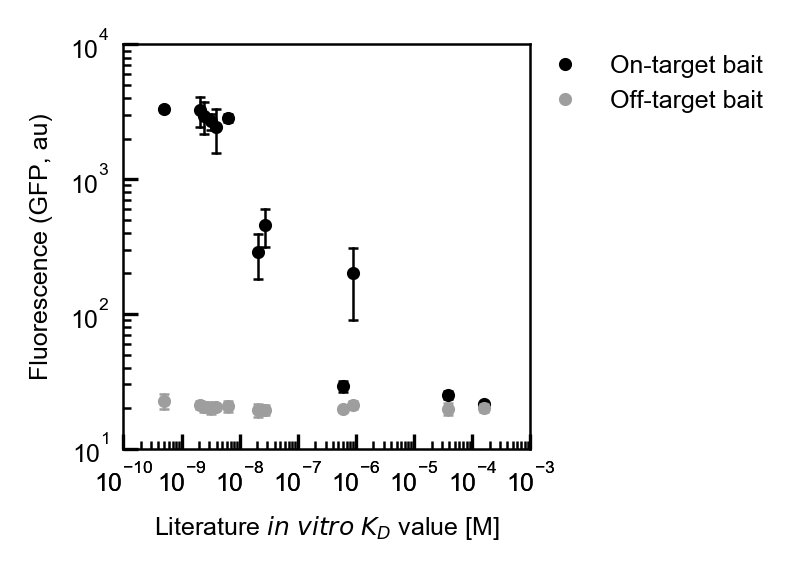

In [38]:
ax = plot_by_kd(metrics_df, ['Min AHL, Mdm2 expr', 'Min AHL, RBD expr'])

plt.savefig(save_dir + 'PMI_min_AHL.pdf')
plt.show()

### Max AHL

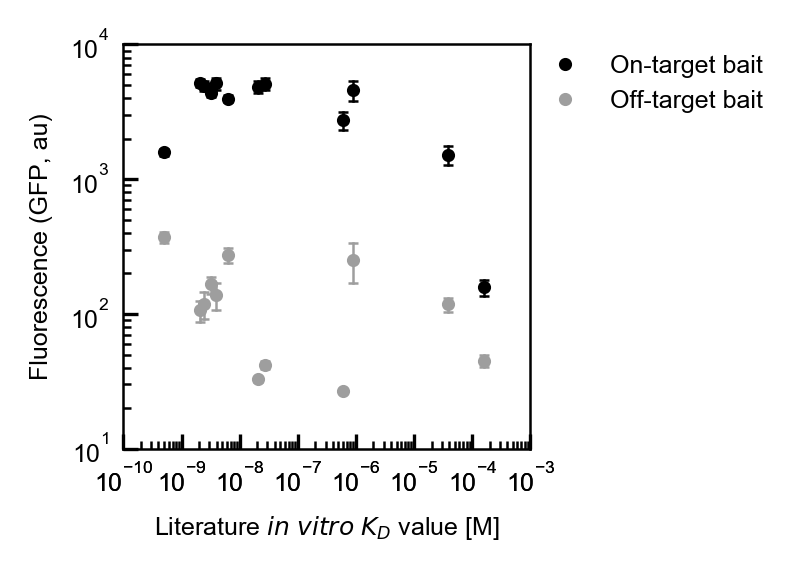

In [39]:
ax = plot_by_kd(metrics_df,['Max AHL, Mdm2 expr', 'Max AHL, RBD expr'])

plt.savefig(save_dir + 'PMI_max_AHL.pdf')
plt.show()

## Specificity plots with proper error propagation

In [40]:
exp_df_median.head()

,name,AHL,bait,repl,FITC-A
0,PMI,0.0,mdm2,1,2273.850098
1,PMI,0.0,mdm2,2,2803.020020
2,PMI,0.0,mdm2,3,2970.419922
3,PMI,0.0,rbd,1,17.670000
4,PMI,0.0,rbd,2,21.389999


In [41]:
def ratio_err(a_mean,b_mean,a_std,b_std):
    return np.abs(a_mean/b_mean)*np.sqrt((a_std/a_mean)**2 + (b_std/b_mean)**2)

In [42]:
grouped_df = exp_df_median.groupby(['name', 'bait', 'AHL'])['FITC-A'].agg([np.mean, np.std]).reset_index()
# Extract each df and then do a dataframe merge
mdm2_df = grouped_df[grouped_df['bait'] == 'mdm2'].drop(columns = ['bait'])
rbd_df = grouped_df[grouped_df['bait'] == 'rbd'].drop(columns = ['bait'])
merged_df = mdm2_df.merge(rbd_df, on = ['name', 'AHL'], suffixes = ['_mdm2', '_rbd'])

# Calculate specificity and error
merged_df['spec'] = merged_df['mean_mdm2'] / merged_df['mean_rbd']
merged_df['spec_err'] = ratio_err(merged_df['mean_mdm2'], merged_df['mean_rbd'], merged_df['std_mdm2'], merged_df['std_rbd'])

new_spec_df = merged_df
new_spec_df.head()

,name,AHL,mean_mdm2,std_mdm2,mean_rbd,std_rbd,spec,spec_err
0,PMI,0.0,2682.430013,363.605339,20.150000,2.147743,133.123080,22.955508
1,PMI,1.0,4379.990072,304.917216,165.539998,23.837767,26.458802,4.231952
2,PMI E5A,0.0,287.679998,106.282093,19.220001,2.147744,14.967741,5.777180
3,PMI E5A,1.0,4869.015218,511.008368,32.860000,1.420598,148.174535,16.818769
4,PMI F3A,0.0,25.110000,1.860000,19.840000,1.935949,1.265625,0.155050


In [43]:
# Merge kd values on
kds_df_2 = kds_df.reset_index()

spec_df_kds = new_spec_df.merge(kds_df_2, how = 'left', on = 'name')
spec_df_kds.head()

,name,AHL,mean_mdm2,std_mdm2,mean_rbd,std_rbd,spec,spec_err,kd
0,PMI,0.0,2682.430013,363.605339,20.150000,2.147743,133.123080,22.955508,3.200000e-09
1,PMI,1.0,4379.990072,304.917216,165.539998,23.837767,26.458802,4.231952,3.200000e-09
2,PMI E5A,0.0,287.679998,106.282093,19.220001,2.147744,14.967741,5.777180,2.100000e-08
3,PMI E5A,1.0,4869.015218,511.008368,32.860000,1.420598,148.174535,16.818769,2.100000e-08
4,PMI F3A,0.0,25.110000,1.860000,19.840000,1.935949,1.265625,0.155050,3.800000e-05


In [44]:
# Make the error bar plot
def spec_plot(df, ax, color):
    
    plt.errorbar(df['kd'].values, df['spec'].values, yerr = df['spec_err'].values,
                capsize = line_width*2, capthick = line_width, fmt = 'o', linestyle = '',
                color = color)
    
    ax.set_ylabel('Specificity')
    ax.set_xlabel("Literature in vitro KD Value")
    
    ax.set_xscale('log', subsx = [2, 3, 4, 5, 6, 7, 8, 9])
    ax.set_xlim(1e-10,1e-3)
    ax.set_ylim(-10,200)
    ax.get_xaxis().set_major_locator(mpl.ticker.LogLocator(numticks = 8))
    ax.xaxis.set_minor_locator(mpl.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
    
    ax.legend(['0.0', '1.0'], bbox_to_anchor=(1.0, 1), 
              loc=2, borderaxespad=0., frameon = False, title = 'OC6-AHL (μM)'
             )

    return ax

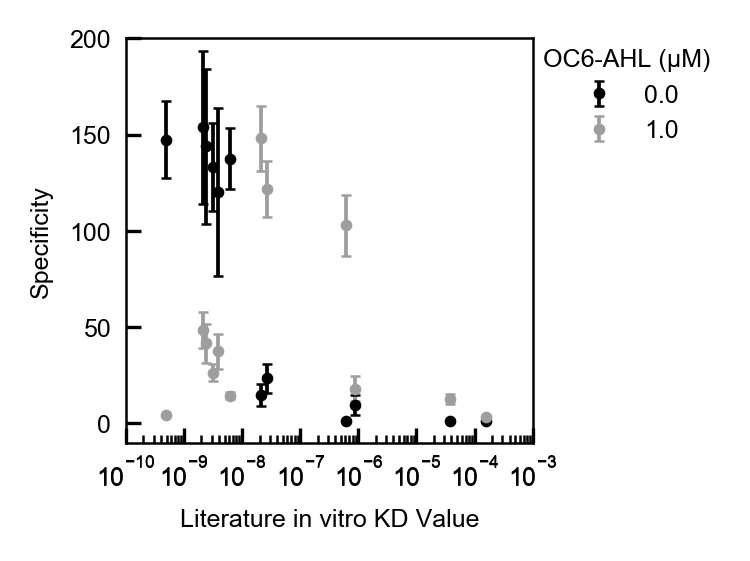

In [45]:
set_plt_defaults()

fig, ax = plt.subplots(figsize = (1.75, 1.75), dpi = 300)

colors = ['black', '#9e9e9e']

for ahl, color in zip([0,1], colors):
    
    sub_df = spec_df_kds[spec_df_kds['AHL'] == ahl]    
    spec_plot(sub_df, ax, color)

plt.savefig(save_dir + 'PMI_specificity.pdf')
plt.show()

## Data export for manuscript

In [47]:
spec_df_kds.to_csv('suppfig1b_data.csv')